In [2]:
import pandas as pd

# Load the dataset (replace 'data.csv' with your actual file name)
data = pd.read_csv(r'/content/transportation-to-work-1.xlsx')

# Display basic information about the dataset
print(data.info())

# Show the first few rows to understand the columns and values
print(data.head())


UnicodeDecodeError: ignored

In [3]:
import pandas as pd

# Try reading the file with different encoding formats
encodings = ['utf-8', 'latin1', 'ISO-8859-1']

for encoding in encodings:
    try:
        data = pd.read_csv('/content/transportation-to-work-1.xlsx', encoding=encoding)
        print("File read successfully using encoding:", encoding)
        # Perform your analysis or print data.info() to check if it's loaded correctly
        break  # Exit the loop if the file is read successfully
    except UnicodeDecodeError:
        print("Failed to read with encoding:", encoding)


ParserError: ignored

In [4]:
with open('/content/transportation-to-work-1.xlsx', 'r') as file:
    lines = file.readlines()

# Print line 42 to identify the issue
print(lines[41])  # Python uses 0-based indexing, so line 42 is at index 41


UnicodeDecodeError: ignored

In [5]:
import pandas as pd

# Read the CSV file while skipping line 42 and specifying UTF-8 encoding
data = pd.read_csv('/content/transportation-to-work-1.xlsx', encoding='utf-8', error_bad_lines=False, skiprows=[41])

# Check the loaded data
print(data.info())
# Perform your analysis or further processing with the loaded DataFrame


<ipython-input-5-a52b2a9eff4e>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('/content/transportation-to-work-1.xlsx', encoding='utf-8', error_bad_lines=False, skiprows=[41])
Skipping line 97: expected 3 fields, saw 4
Skipping line 118: expected 3 fields, saw 4
Skipping line 121: expected 3 fields, saw 4
Skipping line 125: expected 3 fields, saw 5
Skipping line 171: expected 3 fields, saw 4
Skipping line 196: expected 3 fields, saw 4
Skipping line 212: expected 3 fields, saw 5
Skipping line 219: expected 3 fields, saw 4
Skipping line 243: expected 3 fields, saw 4
Skipping line 244: expected 3 fields, saw 5
Skipping line 285: expected 3 fields, saw 10
Skipping line 288: expected 3 fields, saw 4
Skipping line 289: expected 3 fields, saw 4
Skipping line 290: expected 3 fields, saw 12
Skipping line 291: expected 3 fields, saw 22
Skipping line 316: expected 3 fields, saw 4
Sk

ParserError: ignored

In [7]:
import pandas as pd

try:
    data = pd.read_csv('/content/transportation-to-work-1.xlsx', encoding='utf-8',error_bad_lines=False)
except pd.errors.ParserError as e:
    print("ParserError:", e)


ParserError: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.



<ipython-input-7-69ef3b6a4796>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('/content/transportation-to-work-1.xlsx', encoding='utf-8',error_bad_lines=False)
Skipping line 42: expected 3 fields, saw 4
Skipping line 97: expected 3 fields, saw 4
Skipping line 118: expected 3 fields, saw 4
Skipping line 121: expected 3 fields, saw 4
Skipping line 125: expected 3 fields, saw 5
Skipping line 171: expected 3 fields, saw 4
Skipping line 196: expected 3 fields, saw 4
Skipping line 212: expected 3 fields, saw 5
Skipping line 219: expected 3 fields, saw 4
Skipping line 243: expected 3 fields, saw 4
Skipping line 244: expected 3 fields, saw 5
Skipping line 285: expected 3 fields, saw 10
Skipping line 288: expected 3 fields, saw 4
Skipping line 289: expected 3 fields, saw 4
Skipping line 290: expected 3 fields, saw 12
Skipping line 291: expected 3 fields, saw 22
Skipping line 316: 

In [10]:
import pandas as pd

try:
    # Load the Excel file into a DataFrame
    data = pd.read_excel('/content/transportation-to-work-1.xlsx')
except pd.errors.ParserError as e:
    print("ParserError:", e)

# Assuming 'problematic_rows_indices' contains indices of identified problematic rows
problematic_rows_indices = [42, 901, 875,843,813,809,803,795,788,786,728,715,698,688,118,121,125,171,196,212,219,243,244,285,288,289,290,291,316,433,530,534,538,543,553,560,579,590,596,599,604,607,613,637,655,668,679,684]  # Replace with the actual indices

# Create a new DataFrame excluding the problematic rows
clean_data = data[~data.index.isin(problematic_rows_indices)].copy()

# Save the clean DataFrame to a new Excel file
clean_data.to_excel('/content/file.xlsx', index=False)


In [11]:
import pandas as pd

# Load the cleaned data into a DataFrame
clean_data = pd.read_excel('/content/file.xlsx')

# Check the first few rows to ensure the data looks correct
print(clean_data.head())


  ind_id                                     ind_definition reportyear  \
0     42  Percent of residents mode of transportation to...       2000   
1     42  Percent of residents mode of transportation to...       2000   
2     42  Percent of residents mode of transportation to...       2000   
3     42  Percent of residents mode of transportation to...       2000   
4     42  Percent of residents mode of transportation to...       2000   

   race_eth_code race_eth_name geotype  geotypevalue     geoname county_name  \
0            1.0          AIAN      CA           6.0  California         NaN   
1            2.0         Asian      CA           6.0  California         NaN   
2            3.0     AfricanAm      CA           6.0  California         NaN   
3            4.0        Latino      CA           6.0  California         NaN   
4            5.0         NHOPI      CA           6.0  California         NaN   

   county_fips  ...  pop_total  pop_mode   percent LL95CI_percent  \
0    

In [12]:
# Check for missing values
missing_values = clean_data.isnull().sum()
print(missing_values)


ind_id                 0
ind_definition         1
reportyear             1
race_eth_code          1
race_eth_name          1
geotype                1
geotypevalue           1
geoname                1
county_name         1901
county_fips         1901
region_name       112935
region_code       112935
mode                   1
mode_name              1
pop_total          40846
pop_mode           40846
percent            40972
LL95CI_percent    112943
UL95CI_percent    112943
percent_se        112943
percent_rse       112794
CA_decile         194182
CA_RR              40972
version                1
dtype: int64


In [13]:
clean_data.shape

(202155, 24)

In [14]:
# Define columns with high missing values
columns_to_drop = ['LL95CI_percent', 'UL95CI_percent', 'percent_se', 'percent_rse', 'CA_decile', 'region_name', 'region_code']

# Drop columns with high missing values
clean_data.drop(columns=columns_to_drop, inplace=True, errors='ignore')


In [15]:
clean_data.shape

(202155, 17)

In [16]:
# Check for duplicates
duplicate_rows = clean_data.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

# Remove duplicate rows
#clean_data.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [17]:
# Group data by race/ethnicity and mode to get counts
mode_preferences = clean_data.groupby(['race_eth_name', 'mode_name']).size().unstack(fill_value=0)

# Normalize counts to get percentages
mode_preferences_percentage = mode_preferences.div(mode_preferences.sum(axis=1), axis=0) * 100

# Display or visualize the mode preferences by race/ethnicity
print(mode_preferences_percentage)
# or create a heatmap, bar chart, or other visualizations for better understanding


mode_name        Bicycle  Car, Truck, or Van  Car, Truck, or Van: Carpooled  \
race_eth_name                                                                 
AIAN           14.242240           14.303104                      14.242240   
AfricanAm      14.303718           14.282714                      14.282714   
Asian          14.294700           14.278975                      14.294700   
Latino         14.297453           14.288323                      14.279193   
Multiple       14.305750           14.265678                      14.285714   
NHOPI          14.316940           14.316940                      14.207650   
Other          14.157973           14.307004                      14.307004   
Total          14.285714           14.285714                      14.285714   
White          14.281741           14.281741                      14.288694   

mode_name      Car, Truck, or Van: Drove Alone  Public Transportation  \
race_eth_name                                            

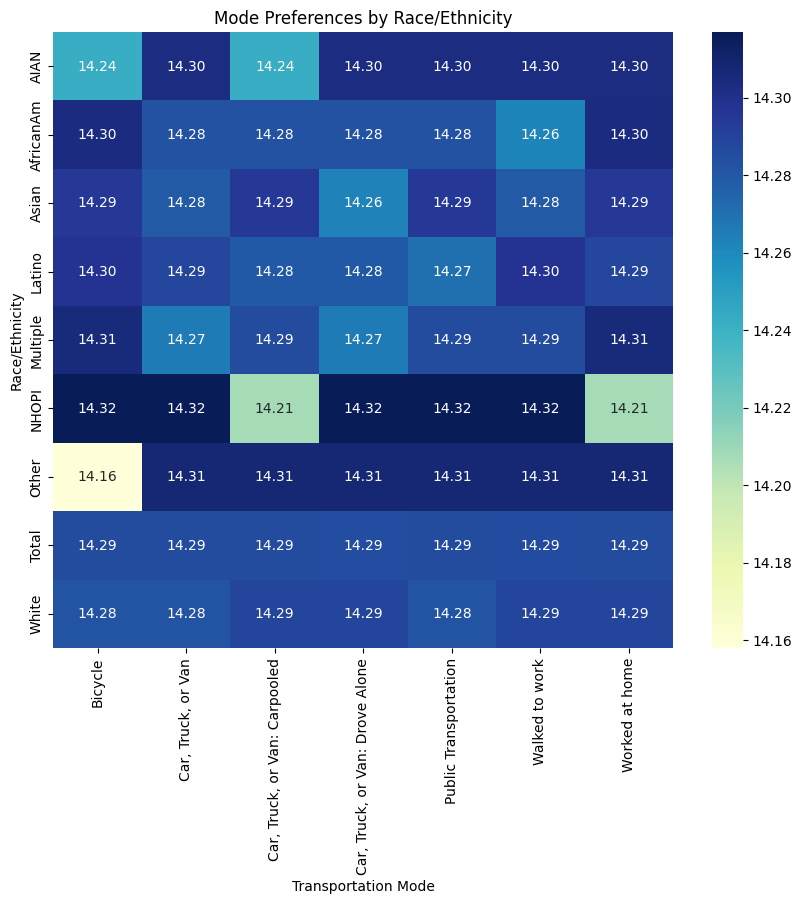

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Create a heatmap of mode preferences by race/ethnicity
plt.figure(figsize=(10, 8))
sns.heatmap(mode_preferences_percentage, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Mode Preferences by Race/Ethnicity')
plt.xlabel('Transportation Mode')
plt.ylabel('Race/Ethnicity')
plt.show()


In [19]:
# Group data by county or region and mode to get counts
county_mode_preferences = clean_data.groupby(['county_name', 'mode_name']).size().unstack(fill_value=0)

# Normalize counts to get percentages
county_mode_preferences_percentage = county_mode_preferences.div(county_mode_preferences.sum(axis=1), axis=0) * 100

# Display or visualize the mode preferences by county or region
print(county_mode_preferences_percentage)
# or create visualizations to represent commuting trends across counties or regions


mode_name          Bicycle  Car, Truck, or Van  Car, Truck, or Van: Carpooled  \
county_name                                                                     
Alameda          14.289717           14.289717                      14.275707   
Alpine           14.418605           14.418605                      13.953488   
Amador           14.320685           14.320685                      14.320685   
Butte            14.232558           14.325581                      14.325581   
Calaveras        14.285714           14.285714                      14.285714   
Colusa           14.285714           14.285714                      14.285714   
Contra Costa     14.287950           14.287950                      14.272300   
Del Norte        14.285714           14.285714                      14.285714   
El Dorado        14.339623           14.264151                      14.188679   
Fresno           14.308910           14.248021                      14.288614   
Glenn            14.358974  

<Figure size 1200x600 with 0 Axes>

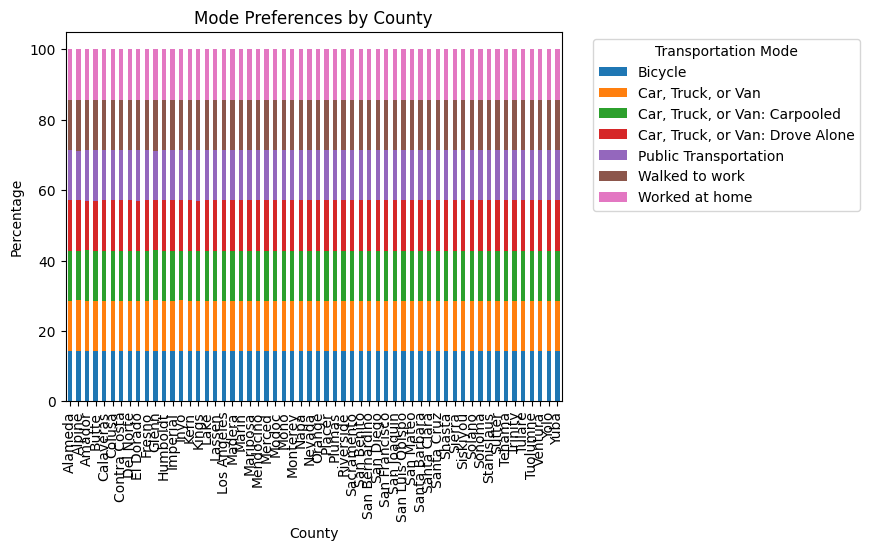

In [20]:
# Example: Create a bar chart of mode preferences by county
plt.figure(figsize=(12, 6))
county_mode_preferences_percentage.plot(kind='bar', stacked=True)
plt.title('Mode Preferences by County')
plt.xlabel('County')
plt.ylabel('Percentage')
plt.legend(title='Transportation Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [21]:
import folium

# Assuming 'clean_data' contains transportation mode preferences by county
# Group data by county and mode to get counts
county_mode_preferences = clean_data.groupby(['county_name', 'mode_name']).size().unstack(fill_value=0)

# Normalize counts to get percentages
county_mode_preferences_percentage = county_mode_preferences.div(county_mode_preferences.sum(axis=1), axis=0) * 100

# Create Folium Map centered around a location
m = folium.Map(location=[37.7749, -122.4194], zoom_start=6)  # Centered on San Francisco as an example

# Add markers for each county (Random locations for representation purpose)
for county in county_mode_preferences_percentage.index:
    folium.Marker(
        location=[county_mode_preferences_percentage.loc[county]['longitude'], county_mode_preferences_percentage.loc[county]['latitude']],  # Replace with actual lat-long data if available
        popup=f"<b>{county}</b><br>{county_mode_preferences_percentage.loc[county].to_string()}",
        tooltip=county
    ).add_to(m)

# Display the map
m


KeyError: ignored

<Figure size 1200x600 with 0 Axes>

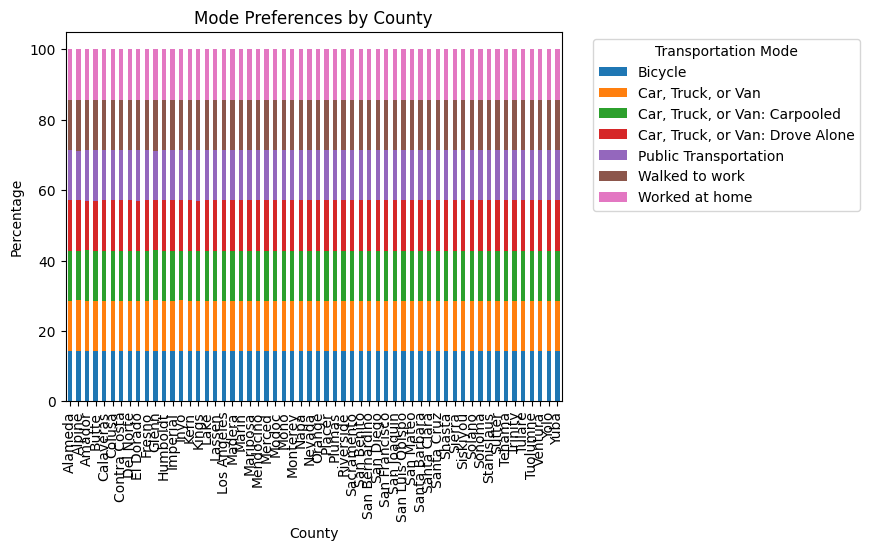

In [22]:
plt.figure(figsize=(12, 6))
county_mode_preferences_percentage.plot(kind='bar', stacked=True)
plt.title('Mode Preferences by County')
plt.xlabel('County')
plt.ylabel('Percentage')
plt.legend(title='Transportation Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


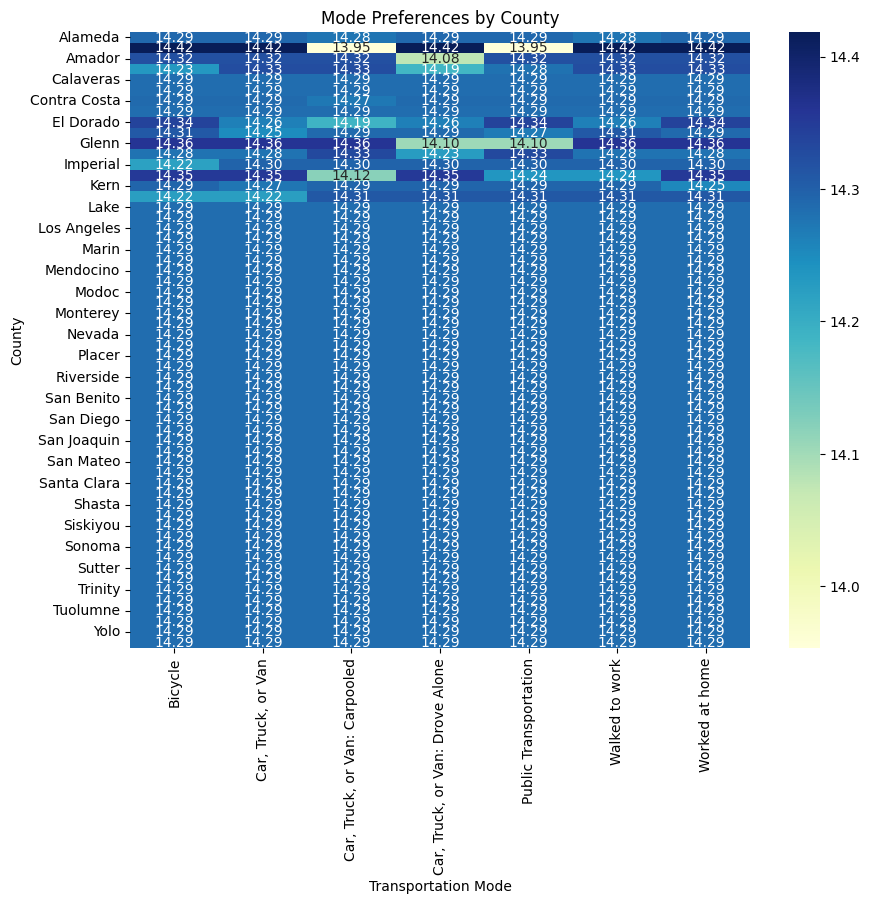

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(county_mode_preferences_percentage, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Mode Preferences by County')
plt.xlabel('Transportation Mode')
plt.ylabel('County')
plt.show()


In [24]:
# Find the most used mode for each county
most_used_mode = county_mode_preferences_percentage.idxmax(axis=1)
print(most_used_mode)


county_name
Alameda                                  Bicycle
Alpine                                   Bicycle
Amador                                   Bicycle
Butte                         Car, Truck, or Van
Calaveras                                Bicycle
Colusa                                   Bicycle
Contra Costa                             Bicycle
Del Norte                                Bicycle
El Dorado                                Bicycle
Fresno                                   Bicycle
Glenn                                    Bicycle
Humboldt           Car, Truck, or Van: Carpooled
Imperial                      Car, Truck, or Van
Inyo                                     Bicycle
Kern                                     Bicycle
Kings              Car, Truck, or Van: Carpooled
Lake                                     Bicycle
Lassen                                   Bicycle
Los Angeles                              Bicycle
Madera                                   Bicycle
Marin   

In [25]:
# Calculate the total percentages for each mode across counties
total_mode_percentages = county_mode_preferences_percentage.sum()

# Find the mode with the highest total percentage
overall_most_used_mode = total_mode_percentages.idxmax()
print(f"The overall most used mode is: {overall_most_used_mode}")


The overall most used mode is: Worked at home


In [26]:
# Group data by year and mode to get counts
yearly_mode_preferences = clean_data.groupby(['reportyear', 'mode_name']).size().unstack(fill_value=0)

# Normalize counts to get percentages
yearly_mode_preferences_percentage = yearly_mode_preferences.div(yearly_mode_preferences.sum(axis=1), axis=0) * 100

# Display or visualize the mode preferences over different years
print(yearly_mode_preferences_percentage)
# or create visualizations to show temporal trends in transportation preferences


mode_name     Bicycle  Car, Truck, or Van  Car, Truck, or Van: Carpooled  \
reportyear                                                                 
2000        14.287288           14.283983                      14.283983   
2005-2007   14.285714           14.285714                      14.285714   
2006-2010   14.286196           14.286196                      14.286196   
2008-2010   14.285714           14.285714                      14.285714   

mode_name   Car, Truck, or Van: Drove Alone  Public Transportation  \
reportyear                                                           
2000                              14.281780              14.286186   
2005-2007                         14.285714              14.285714   
2006-2010                         14.286196              14.283949   
2008-2010                         14.285714              14.285714   

mode_name   Walked to work  Worked at home  
reportyear                                  
2000             14.288389      